In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
df=pd.read_csv(r'/Users/clairekraft/Desktop/Python/data/Rainfall_UK.csv')

In [3]:
df

,Year,Type of period,Period,Avg rainfall(in mm),Avg temp(in centigrade)
0,2010,Monthly,JAN,69.5,0.80
1,2010,Monthly,FEB,71.7,1.60
2,2010,Monthly,MAR,65.1,5.50
3,2010,Monthly,APR,21.4,8.20
4,2010,Monthly,MAY,22.1,9.80
...,...,...,...,...,...
165,2019,Season,Winter,130.4,4.89
166,2019,Season,Spring,162.1,8.38
167,2019,Season,Summer,279.0,15.67
168,2019,Season,Autumn,344.4,9.26


In [4]:
df.shape

(170, 5)

In [5]:
df.nunique()

Year                        10
Type of period               3
Period                      17
Avg rainfall(in mm)        158
Avg temp(in centigrade)    123
dtype: int64

In [6]:
df.describe()

,Year,Avg rainfall(in mm),Avg temp(in centigrade)
count,170.000000,170.000000,170.000000
mean,2014.500000,140.540588,9.300235
std,2.880767,179.608045,4.355358
min,2010.000000,10.300000,-1.200000
25%,2012.000000,52.625000,5.485000
50%,2014.500000,78.800000,9.320000
75%,2017.000000,147.900000,12.975000
max,2019.000000,1043.000000,17.800000


In [7]:
df.isnull().sum()

Year                       0
Type of period             0
Period                     0
Avg rainfall(in mm)        0
Avg temp(in centigrade)    0
dtype: int64

In [8]:
Q1 = df[['Avg rainfall(in mm)', 'Avg temp(in centigrade)']].quantile(0.25)
Q3 = df[['Avg rainfall(in mm)', 'Avg temp(in centigrade)']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Avg rainfall(in mm)        95.275
Avg temp(in centigrade)     7.490
dtype: float64


In [9]:
df = df[~((df[['Avg rainfall(in mm)', 'Avg temp(in centigrade)']] < (Q1 - 1.5 * IQR)) |(df[['Avg rainfall(in mm)', 'Avg temp(in centigrade)']] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(156, 5)

In [10]:
df.describe()

,Year,Avg rainfall(in mm),Avg temp(in centigrade)
count,156.000000,156.000000,156.000000
mean,2014.493590,93.914103,9.294231
std,2.879285,61.080596,4.517665
min,2010.000000,10.300000,-1.200000
25%,2012.000000,50.100000,5.375000
50%,2014.500000,74.400000,9.245000
75%,2017.000000,122.275000,13.400000
max,2019.000000,279.000000,17.800000


,Year,Avg rainfall(in mm),Avg temp(in centigrade)
Year,1.000000,0.011872,0.074703
Avg rainfall(in mm),0.011872,1.000000,0.027641
Avg temp(in centigrade),0.074703,0.027641,1.000000


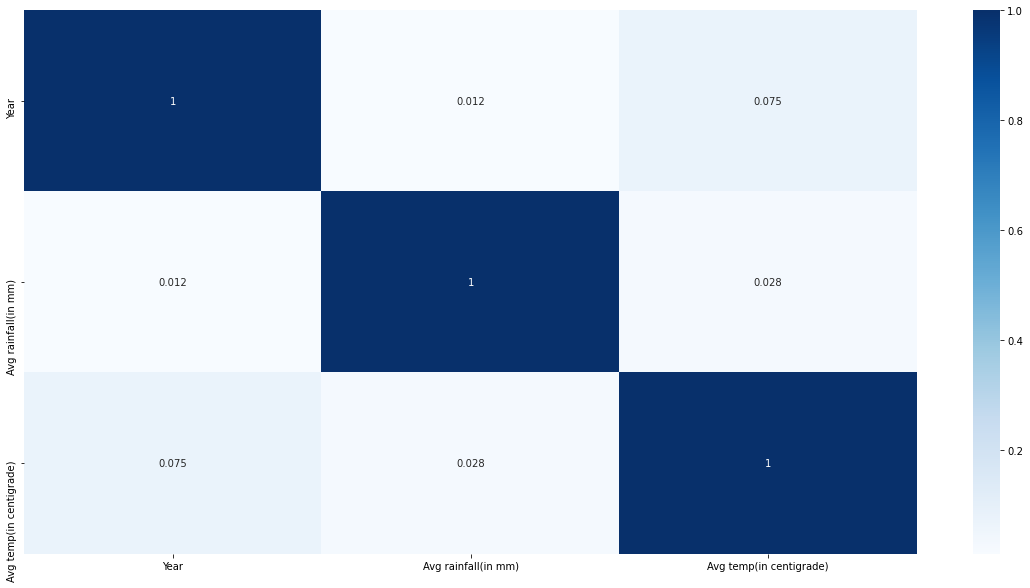

In [11]:
plt.figure(figsize=(20,10))
c=df.corr()
sns.heatmap(c,cmap='Blues', annot=True)
c

<AxesSubplot:xlabel='Avg temp(in centigrade)', ylabel='Count'>

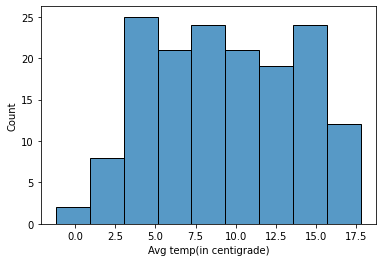

In [12]:
sns.histplot(df['Avg temp(in centigrade)'])

<AxesSubplot:xlabel='Avg rainfall(in mm)', ylabel='Count'>

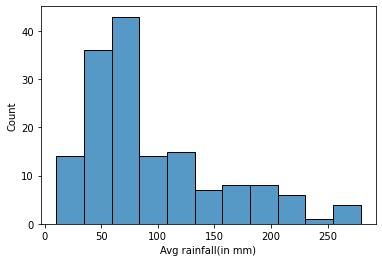

In [13]:
sns.histplot(df['Avg rainfall(in mm)'])

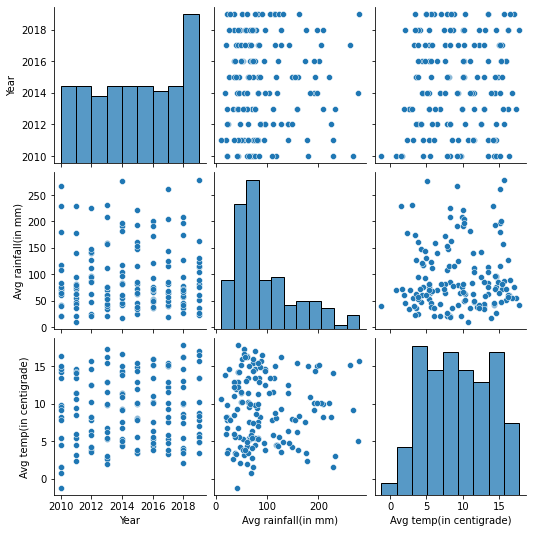

In [14]:
sns.pairplot(df)

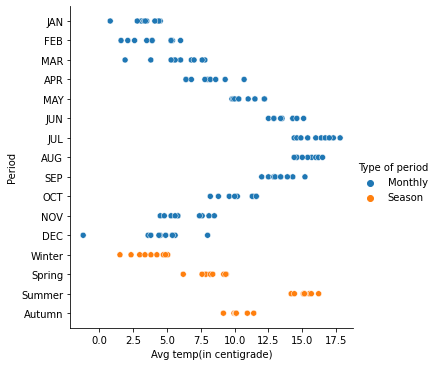

In [15]:
sns.relplot(x=df['Avg temp(in centigrade)'], y=df['Period'], hue='Type of period', data=df)

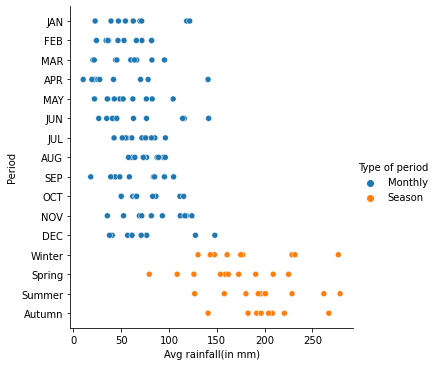

In [16]:
sns.relplot(x=df['Avg rainfall(in mm)'], y=df['Period'], hue='Type of period', data=df)

<AxesSubplot:xlabel='Avg temp(in centigrade)'>

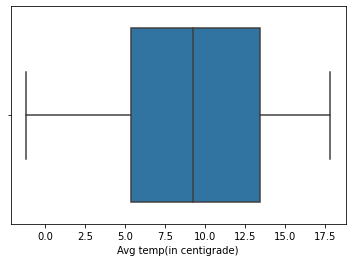

In [17]:
sns.boxplot(x=df['Avg temp(in centigrade)'], data=df)

<AxesSubplot:xlabel='Avg rainfall(in mm)'>

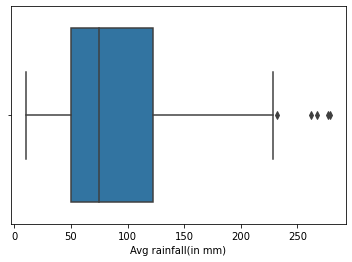

In [18]:
sns.boxplot(x=df['Avg rainfall(in mm)'], data=df)

In [19]:
#Enjoy the UK